In [1]:
%matplotlib inline

user-defined LaTeX commands
$\newcommand{\Er}{\mathcal{E}}$
$\newcommand{\Xset}{\mathcal{X}}$
$\newcommand{\Yset}{\mathcal{Y}}$
$\newcommand{\L}{\mathcal{L}}$
$\newcommand{\l}{\mathcal{l}}$
$\newcommand{\pr}{\mathbb{P}}$
$\newcommand{\E}{\mathbb{E}}$
$\newcommand{\D}{\mathbb{D}}$
$\newcommand{\w}{\mathbf{w}}$
$\newcommand{\X}{\mathbf{X}}$
$\newcommand{\y}{\mathbf{y}}$
$\newcommand{\x}{\mathbf{x}}$
$\newcommand{\J}{\mathbf{J}}$
$\newcommand{\I}{\mathbf{I}}$
$\newcommand{\X}{\mathbf{X}}$
$\newcommand{\S}{\mathbf{S}}$
$\newcommand{\e}{\mathbf{e}}$
$\newcommand{\C}{\mathbf{C}}$
$\newcommand{\K}{\mathbf{K}}$
$\newcommand{\R}{\mathbb{R}}$
$\newcommand{\v}{\mathbf{v}}$
$\newcommand{\phivec}{\boldsymbol{\phi}}$
$\newcommand{\sign}{\mathrm{sign}}$
$\newcommand{\F}{\mathcal{F}}$

$\newcommand{\tg}{\mathrm{tg}}$
$\newcommand{\ctg}{\mathrm{ctg}}$
$\newcommand{\arctg}{\mathrm{arctg}}$
$\newcommand{\cov}{\mathrm{cov}}$

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
from ggplot import *

In [4]:
from scipy.stats import uniform
from scipy.stats import norm
from scipy.stats import bernoulli
from scipy.stats import multivariate_normal
from scipy.stats import cauchy
from scipy.stats import expon
from scipy.stats import t
from scipy.stats import chi2
from scipy.stats import beta
from scipy.stats import laplace

### Basic Probability Definitions
**Probability Space** $\left( \Omega, \F, \pr \right)$ : $\Omega = \{\omega_1, \omega_2, \ldots \}$ - sample space, $\F$ - $\sigma$-algebra of events, $\pr$ - probability measure.

**Algebra of events** 
* $\displaystyle{\emptyset \in \F, \Omega \in \F}$
* $\displaystyle{\forall A \in \F : \Omega \setminus A \in \F}$
* $\displaystyle{\forall A_1, A_2 \in \F : A_1 \cup A_2 \in \F}$

**$\sigma$-algebra of events**
* $\displaystyle{\forall B \in {\mathcal B} : \R \setminus B \in {\mathcal B}}$ 
* $\displaystyle{\forall B_1, B_2, \ldots \in {\mathcal B} : \bigcup_i B_i \in {\mathcal B}}$

**Probability Measure**
* $\displaystyle{\pr \left(\emptyset \right) = 0, \pr\left(\Omega \right) = 1}$
* $\displaystyle{\forall A  : 0 \leq \pr\left( A\right) \leq 1}$ 
* $\displaystyle{\forall A_i, A_j; A_i \cap A_j =\emptyset : \pr \left( \bigcup_i A_i \right) = \sum_i \pr\left( A_i \right)}$

**Why $\sigma$-additivity? - Banach-Tarski paradox**
* BT paradox is a theorem, which states the existence of decomposition of a 3-d ball into finite number of disjoint parts, which can be assembled into two identical copies of original ball (can be proven by using axiom of choice).

* Contradicts geometrical intuition: decomposition ought to preserve volume.

* The essence of paradox is that in 3-d space there exist nonmeasurable sets, which do not have "volume" (with additivity property).

**Probability: properties**
* $\displaystyle{\pr(\Omega)=1}$, $\displaystyle{\pr(\emptyset)=0}$.
* $\displaystyle{\pr(A\cup B)=\pr(A)+\pr(B)-\pr(A\cap B)}$.
* If $\displaystyle{A\cap B=\emptyset}$, then $\displaystyle{\pr(A+B)=\pr(A)+\pr(B)}$.
* $\displaystyle{\pr(A) + \pr(\bar{A})=1}$.


**Conditional probability**
Let $\pr(A)>0$, then $\pr(B|A)=\displaystyle\frac{\pr(AB)}{\pr(A)}$.

**Conditional probabilitiy: properties**
* $\pr(A|A)=1$,  $\pr(\emptyset|A)=0$.
* Let $B\supseteq A$, then $\pr(B|A)=1$.
* $\pr(B_1+B_2|A)=\pr(B_1|A)+\pr(B_2|A)$.
* $\pr(B|A)+\pr(\bar{B}|A)=1$.
		But
* $\pr(B|A)+\pr(B|{\bar A})\neq1$, $\pr(B|A)+\pr(\bar{B}|\bar{A})\neq1$.

In [5]:
def I1(x, A):
    if x >= A[0] and x < A[1]:
        return 1
    else:
        return 0

In [6]:
def I2(x, A, B):
    return I1(x, A)*I1(x, B)

In [7]:
n = 1000
X=norm().rvs(size=n)
A = [-1,1]
B = [0,1]
np.array([I1(x, A) for x in X]).sum()/n

0.68300000000000005

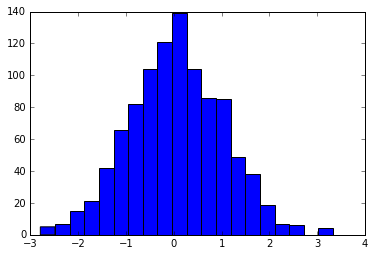

In [8]:
plt.hist(X, bins=20);

In [9]:
def cond_prob(x, A, B):
    Pab = np.array([I2(x, A, B) for x in X]).sum()
    Pa = np.array([I1(x, A) for x in X]).sum()
    if Pa > 0:
        return Pab/Pa
    else:
        return 0

In [10]:
cond_prob(X, A, B)

0.50658857979502192

## Bayes Theorem

**Total Probability Formula**
Let $\{A_k\}_{k=1}^n, A_i\cap A_j =\emptyset, \pr(A_k)>0$, then $\pr(B)=\displaystyle\sum_{k=1}^n\pr(B|A_k)\pr(A_k)$.

**Bayes Theorem - simple form**
Let $H$ stand for *hyphothesis*, $D$ denotes *data*, then $\displaystyle{\pr(H|D)=\frac{\pr(D|H\pr(H)}{\pr(D)}}$

* Prior distribution $\pr(H)$
* Likelihood $\pr(D|H)$
* Posterior distribution $\pr(H|D)$

**Bayes Theorem - more general form**
Let $\{A_k\}_{k=1}^n, A_i\cap A_j =\emptyset, \pr(A_k)>0$, then $\pr(A_k|B)=\displaystyle\frac{\pr(A_k)\pr(B|A_k)}{\displaystyle\sum_{i=1}^n\pr(A_i)\pr(B|A_i)}$.

**Bayes Rule as a hyphothesis testing instrument**
Let $H_1$ and $H_2$ be 2 concurrent hyphothesis. Take hyphothesis $H_k$, for which $\displaystyle{\pr(D|H_k)\pr(H_k)=\pr(DH_k)}$ - joint probability is larger.

In [283]:
n = 1000
x = bernoulli(p=0.55).rvs(size=n)

In [284]:
def joint_prob(x, p, i, prior):
    likelihood = bernoulli(p=p[i]).logpmf(x).sum()
    return likelihood + prior.logpmf(i)

In [285]:
def accept(x, p, i1, i2, prior):
    if joint_prob(x, p, i1, prior) > joint_prob(x, p, i2, prior):
        return p[i1]
    else:
        return p[i2]

In [286]:
from scipy.stats import rv_discrete

In [287]:
xk = np.array([0.5, 0.55])
pk = np.array([0.5, 0.5])
discrete = rv_discrete(name='discrete', values=(range(len(xk)), pk))
prior = discrete
p = xk

In [288]:
path = np.array([accept(x[:k], p, 0, 1, prior) for k in range(1,len(x))])

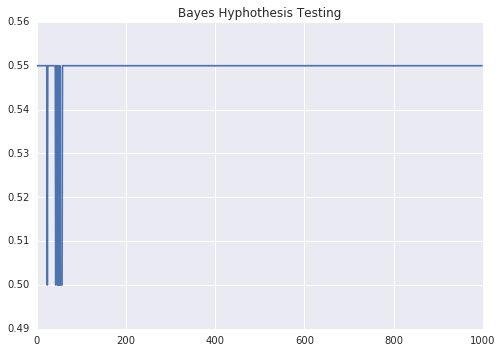

In [289]:
plt.title('Bayes Hyphothesis Testing')
plt.plot(path)
plt.ylim(xk[0]-0.01,xk[1]+0.01);

### Random variables

**Random variable**
$\xi: \left(\Omega,\F\right) \rightarrow \left(\R,{\mathcal B}\right)$ random variable is a measurable function:
$\forall B \in {\mathcal B}, A=\xi^{-1}\left(B \right)=\{ \omega: \xi\left(\omega \right)\in B\} \Rightarrow A \in \F$

**Why measurable?**
$x(t)\in {\mathcal C}\left(T\right),\quad x_{\mathbb Q}(t)=
\left\{ \begin{array}{ll}
		x(t), & t\not\in {\mathbb Q};\\
		x(t)+u_t, & t\in {\mathbb Q}, u_t\sim U[-1,+1].
\end{array}\right.$

$\xi_0(t)=x(t),\quad \xi_1(t)=x_{\mathbb Q}(t)\\
\pr\left(\xi_0(t)=\xi_1(t)\right)=\pr\left(t\not\in{\mathbb Q}\right)=1 \Rightarrow \\
1=\pr\left(\xi_0(t)\in {\mathcal C}\left(T\right)\right)=\pr\left(\xi_1(t)\in {\mathcal C}\left(T\right)\right)=0\quad !!!$

### Probability distributions

**Probability distribution**
Probability measure: $\pr_{\xi}\left(B \right)=\pr \left(\xi^{-1}(B) \right), \forall B \in {\mathcal B}$ 

**Probability distribution function**
$F_{\xi}(x)=\pr_{\xi}\left((-\infty, x] \right)=\pr \left(\xi \leq x \right)$

**Discrete Distribution**
Finite or countable set of points ${x_k}$: $\pr(\xi=x_k)=p_k$, $\sum_k p_k=1$.

**Absolutely Continuous Distribution**
$\xi:\quad F\left(x \right)=\int_{-\infty}^x f(u) d u, \quad \int_{-\infty}^{+\infty}p(x) d x = 1$.

### Random Variable Expectation and Variance

**Expectation**
* Discrete r.v.: $\E\xi = \sum_k x_k p_k$.
* Absolutely continuous r.v.: $\E\xi = \int_{-\infty}^{+\infty}x p(x) d x$.

**Variance**
* Discrete r.v.: $\D\xi = \E(\xi-\E\xi)^2=\E\xi^2-\E^2\xi = \sum_k x_k^2 p_k - \left( \sum_k x_k p_k \right)^2$.
* Absolutely continuous r.v.: $\D\xi = \E\left(\xi-\E\xi\right)^2=\E\xi^2 - \E^2\xi=\int_{-\infty}^{+\infty}x^2 p(x) d x - \E^2\xi$.

**Covariance matrix**

Let $\X=(X_1,\ldots,X_n)^T$ - random vector. Let $\E X_i=\mu_i$, then covariance matrix is a matrix with elements:
$\displaystyle{\Sigma_{ij}=\mathrm{cov}(X_i,X_j)=\E(X_i-\mu_i)(X_j-\mu_j)}$

**Correlation matrix**

Let $\X=(X_1,\ldots,X_n)^T$ - random vector. Let $\D X_i=\sigma^2_i$, then correlation matrix is a matrix with elements:
$\displaystyle{\rho_{ij}=\frac{\mathrm{cov}(X_i,X_j)}{\sigma_i\sigma_j}}$

**Bernoulli Distribution**
R.v. $\xi$ has Bernoulli Distribution $\xi\in Ber(p,q)$ if $\pr(\xi=+1)=p, \pr(\xi =-1)=q, p+q=1$.
* Expectation: $\E\xi = p-q$. 
* Variance: $\D\xi = \E\xi^2-\E^2\xi=1-(p-q)^2=4pq$.		

**Binomial Distribution**

R.v. $S_n$ has Binomial Distribution $S_n\in B_n(p,q)$ if $S_n=\displaystyle\sum_{k=1}^n\xi_k, \xi_k\in Ber(p,q)$.

* Expectation: $\E S_n = n(p-q)$. 
* Variance: $\D S_n =4npq$.	

**Random Walk**

$S_n=\displaystyle\sum_{k=1}^n\xi_k$, $\pr(\xi=1)=p$, $\pr(\xi=-1)=1-p$

In [19]:
p = 0.5

In [20]:
xk=np.array([1,-1])
pk=np.array([p, 1-p])
ber = rv_discrete(name='ber', values=(xk, pk))

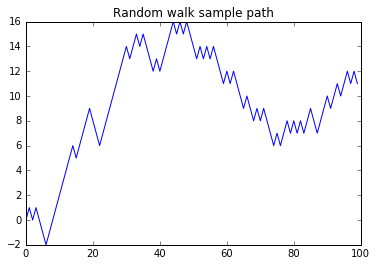

In [21]:
n = 100
x = ber.rvs(size=n)
S = np.cumsum(x)
S = np.insert(S,0,0)[:-1]
plt.plot(S)
plt.title('Random walk sample path');

**Long head-runs in Bernoulli trials**

How to distinguish random head and tail sequence (produced by coin flipping) and artificial one? Longest run of pure heads in $n$ Bernoulli trials (T. Varga, Erdos, Revesz).

**Theorem**

Let $Z_N$ be the longest head-run till $N$, then $\displaystyle \lim_{N\rightarrow\infty}\frac{Z_N}{\log_2 N}=1$ a.s.

In [22]:
def random_walk(p, n):
    xk=np.array([1,-1])
    pk=np.array([p, 1-p])
    ber = rv_discrete(name='ber', values=(xk, pk))
    x = ber.rvs(size=n)
    S = np.cumsum(x)
    return x, np.insert(S,0,0)[:-1]

In [23]:
def longest_head_run(p, n):
    x, S = random_walk(p, n)
    Z = []
    j = 0
    z = 1
    for i in range(len(x)-1):
        if x[i] == x[i+1]:
            z +=1
        else:
            Z.append(z)
            z = 1
    return np.array(Z).max()

In [24]:
p = 0.5
n = 1000
longest_head_run(p, n)

9

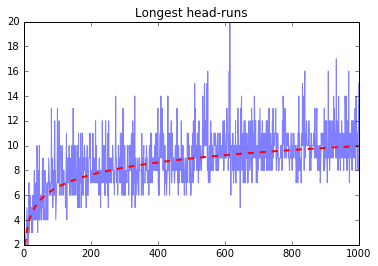

In [27]:
n=1000
N = np.linspace(1,n,n).astype(int)
z = np.array([longest_head_run(p, k) for k in N[3:]])
l = np.log2(N[3:])

plt.title('Longest head-runs')
plt.plot(N[3:],z,alpha=0.5)
plt.plot(N[3:],l,color='red',linewidth=2,linestyle='--');

**Law of Iterated Logarithm**

Law of Iterated Logarithm (Khinchine, 1923): Let $b_n=(2n\log\log n)^{-1/2}$, then $\displaystyle \limsup_{n\rightarrow\infty}b_nS_n=1$ a.s.

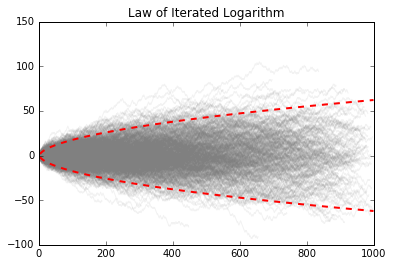

In [28]:
n=1000

plt.title('Law of Iterated Logarithm')
for k in range(3, n):
    _, S = random_walk(p, k)
    plt.plot(S, alpha=0.1, color='grey')

N = np.linspace(1,n,n).astype(int)[3:]
ll = np.sqrt(2*N*np.log(np.log(N)))
plt.plot(N,ll,color='red',linewidth=2,linestyle='--')
plt.plot(N,-ll,color='red',linewidth=2,linestyle='--');

**Geometric distribution**

R.v. $\xi$ has Geometric Distribution $\xi\in G(p)$ if $\pr(\xi=k)=p(1-p)^k=pq^k$.

* Expectation: $\E\xi = \displaystyle\sum_{k=0}^\infty kpq^k=pq\frac{\partial}{\partial q}\left(\displaystyle\sum_{k=1}^\infty q^k\right)=\frac{q}{p}$. 
* Variance: $\D\xi = \E\xi^2-\E^2\xi=\frac{q}{p^2}$.	
* **Lack of memory** property: $\pr\left(\xi>n+k | \xi>n\right)=\pr\left(\xi>k \right)$.	

**Poisson distribution**

R.v. $\xi$ has Poisson Distribution $\xi\in \Pi_\lambda$ if $\pr(\xi=k)=\displaystyle\frac{\lambda^k}{k!}e^{-\lambda}$.

* Expectation: $\E\xi = \displaystyle\sum_{k=0}^\infty k\displaystyle\frac{\lambda^k}{k!}e^{-\lambda}=\lambda e^{-\lambda}\displaystyle\sum_{k=1}^\infty \frac{\lambda^{k-1}}{(k-1)!}=\lambda$, $\E\xi^2=\lambda^2+\lambda$. 
* Variance: $\D\xi = \lambda$.	

**Uniform distribution**

R.v. $\xi$ has Uniform Distribution $\xi\in U_{[a,b]}$ if $f(x)=\displaystyle\frac{1}{b-a}I_{[a,b]}(x)$ and $F(x)=\displaystyle\frac{x-a}{b-a}$.
	
* $\E\xi=\displaystyle\int_a^b\frac{x}{b-a}dx=\displaystyle\frac{a+b}{2}$, 
* $\E\xi^2=\displaystyle\int_a^b\frac{x^2}{b-a}dx=\displaystyle\frac{b^3-a^3}{3(b-a)}$, 
* $\D\xi=\displaystyle\frac{(b-a)^2}{12}$.

**Exponential distribution**

R.v. $\xi$ has Exponential Distribution $\xi\in E_{\lambda} $ if $f(x)=\lambda e^{-\lambda x}I_{(0,+\infty)}(x)$, $F(x)=1-e^{-\lambda x}$.

* $\E\xi^k=\displaystyle\int_0^{\infty}\alpha x^k e^{-\alpha x}dx=\displaystyle\frac{1}{\alpha^k}\int_0^{\infty}(\alpha x)^k e^{-\alpha x}d(\alpha x)=\displaystyle\frac{\Gamma(k+1)}{\alpha^k}=\displaystyle\frac{k!}{\alpha^k}$, 
* $\E\xi=\displaystyle\frac{1}{\alpha}$, $\E\xi^2=\displaystyle\frac{2}{\alpha^2}$, $\D\xi=\displaystyle\frac{1}{\alpha^2}$.
* **Lack of memory** property: $\pr\left(\xi>t+s | \xi>t\right)=\pr\left(\xi>s \right)$.		
* Relation to Geometric distribution: if $\xi\in E_{\lambda}$, then $\eta=[\xi]$ has a Geometric distribution. 

**Cauchy distribution**

R.v. $\xi$ has Cauchy Distribution $\xi\in {\mathcal Cauchy}$ if $f(x)=\displaystyle\frac{1}{\pi(1+x^2)}$, $F(x)=\displaystyle\frac{1}{\pi}\arctan(x)+\frac{1}{2}$.
	
* $\xi_i \sim {\mathcal Cauchy}, i =1,\ldots,n,\quad\Rightarrow\quad S_n=\displaystyle\frac{1}{n}\sum_{i=1}^n\xi_i \sim {\mathcal Cauchy}$. 	

**Normal distribution**

R.v. $\xi$ has Normal Distribution $\xi\in N(a,\sigma^2)$ if $\phi_{a,\sigma^2}(x)=\displaystyle\frac{1}{\sqrt{2\pi}\sigma}\exp(-\frac{(x-a)^2}{2\sigma^2})$, $\Phi(x)=\displaystyle\frac{1}{\sqrt{2\pi}}\int_{-\infty}^x\exp(-\frac{u^2}{2})du$.

* $\mu_k=\E(\xi-a)^k=\displaystyle\frac{1}{\sqrt{2\pi}\sigma}\int_{-\infty}^{+\infty}(x-a)^ke^{-\frac{(x-a)^2}{2\sigma^2}}dx=
\displaystyle\frac{\sigma^k}{\sqrt{2\pi}}\int_{-\infty}^{+\infty}u^ke^{-\frac{u^2}{2}}du$. 
* $\mu_{2n+1}=\displaystyle\frac{\sigma^{2n+1}}{\sqrt{2\pi}}\int_{-\infty}^{+\infty}u^{2n+1}e^{-\frac{u^2}{2}}du=\displaystyle\frac{\sigma^{2n+1}}{\sqrt{2\pi}}\int_{-\infty}^{0}u^{2n+1}e^{-\frac{u^2}{2}}du+\displaystyle\frac{\sigma^{2n+1}}{\sqrt{2\pi}}\int_{0}^{+\infty}u^{2n+1}e^{-\frac{u^2}{2}}du=0$.
* $\mu_{2n}=\displaystyle\frac{\sigma^{2n}}{\sqrt{2\pi}}\int_{-\infty}^{+\infty}u^{2n}e^{-\frac{u^2}{2}}du=
\displaystyle\frac{2\sigma^{2n}}{\sqrt{2\pi}}\int_{0}^{+\infty}u^{2n}e^{-\frac{u^2}{2}}du=
(2n-1)\displaystyle\frac{2\sigma^{2n}}{\sqrt{2\pi}}\int_{-\infty}^{+\infty}u^{2n-2}e^{-\frac{u^2}{2}}du=(2n-1)(2n-3)\displaystyle\frac{2\sigma^{2n}}{\sqrt{2\pi}}\int_{-\infty}^{+\infty}u^{2n-4}e^{-\frac{u^2}{2}}du=\dots=
\displaystyle\sqrt{\frac{2}{\pi}}\sigma^{2n}(2n-1)!!\int_0^{\infty}e^{-\frac{u^2}{2}}du=(2n-1)!!\sigma^{2n}$
* $\E\xi = a$, $\D\xi=\sigma^2$.	

### Limit Theorems

* Let $\displaystyle \{\xi_k\}_{k=1}^{\infty}$ be a sequence of i.i.d. Bernoulli r.v.: $\pr(\xi_k=1)=p$, $\pr(\xi_k=0)=1-p=q$. Then $\E\xi_k=p$ and $\D\xi_k=pq$.
* Sum of Bernoulli r.v. $S_n=\xi_1+\ldots +\xi_n$ follows Binomial distribution $B(n,p)$ with $\E S_n=np$ and $\D S_n=npq$. 

**Law of Large Numbers**
For all $\varepsilon>0$ holds $\displaystyle \pr\left(\left|\frac{S_n}{n}-p\right|>\varepsilon\right)\rightarrow 0$ as $n\rightarrow\infty$.

**Strong Law of Large Numbers**
For all $\varepsilon>0$ holds $\displaystyle \pr\left(\sup_{k\geq n}\left|\frac{S_k}{k}-p\right|>\varepsilon\right)\rightarrow 0$ as $n\rightarrow\infty$.

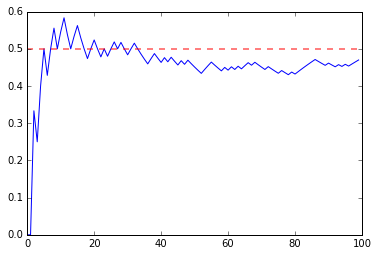

In [29]:
p = 0.5
n = 100
x = bernoulli.rvs(p=p,size=n)
S = np.cumsum(x)
k = np.arange(1,n+1)
plt.plot(S/k)
plt.axhline(y=p, linewidth=2, color = 'red',alpha=0.5, linestyle='--');

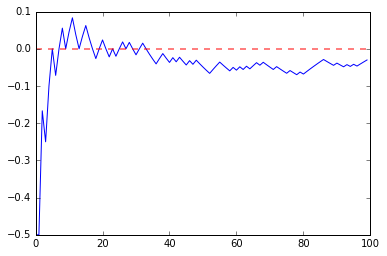

In [30]:
delta = S/k-p
plt.plot(delta)
plt.axhline(y=0, linewidth=2, color = 'red',alpha=0.5, linestyle='--');

In [31]:
def large_deviations_prob(x, level, n=None):
    if n == None:
        n = len(x)//2
    a = np.abs(level)
    return 1.-np.array([I1(xi, [-a, a]) for xi in x[n:]]).sum()/(len(x)-n)

In [32]:
large_deviations_prob(delta, 0.05)

0.38

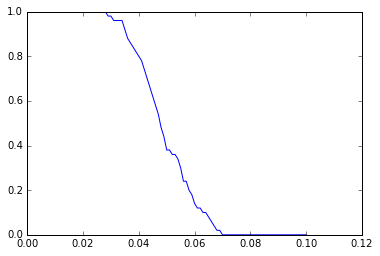

In [33]:
levels = np.linspace(0.001,0.1,100)
dev = [large_deviations_prob(delta, level) for level in levels]
plt.plot(levels, dev);

In [34]:
p = 0.5
n = 100
m = 1000
x = bernoulli.rvs(p=p,size=n*m).reshape(n,m)
S = np.cumsum(x, axis=0)
k = np.arange(1,n+1)
delta = np.divide(S.T, k).T - p

In [35]:
def SLLN_prob(x, level, n=None):
    if n == None:
        n = x.shape[0]//2
    # number of samples
    m = x.shape[1]
    a = np.abs(level)
    X = x[n:,:].T
    return 1. - np.array([I1(np.max(xi), [-a, a]) for xi in X]).sum()/m

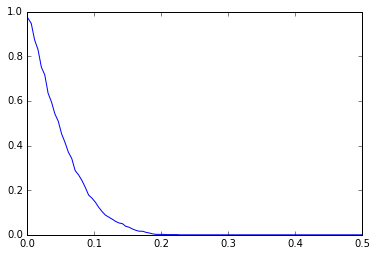

In [36]:
levels = np.linspace(0.001,0.5,100)
dev = [SLLN_prob(delta, level) for level in levels]
plt.plot(levels, dev);

** DeMoivre-Laplace Limit Theorem **

Let $\xi_k: \pr(\xi_k=1)=p, \pr(\xi_k=0)=q$ $\forall k=1,\ldots,n$ and $S_n=\displaystyle\sum_{k=1}^n\xi_k$ be a number of successes,then for fixed $z_1$ and $z_2$ as $n\rightarrow\infty$
$\displaystyle\pr(np+z_1\sqrt{npq}\leq S_n\leq np+z_2\sqrt{npq})\rightarrow \Phi(z_2)-\Phi(z_1)$.
Denote reduced number of successes $\displaystyle S_n^*=\frac{S_n-np}{\sqrt{npq}}$, then theorem can be restated in the form $\displaystyle\pr(z_1\leq S_n^*\leq z_2)\rightarrow \Phi(z_2)-\Phi(z_1)$.

** Central Limit Theorem**

Let $X_1,\ldots,X_n,\ldots$ be i.i.d. r.v. and $\E X_i^2<\infty$, $S_n=\displaystyle\sum_{i=1}^nX_i$, then
$\displaystyle\pr\left(a\leq \frac{S_n-n\E X}{\sqrt{n\D X}}\leq b\right)\rightarrow \Phi(b)-\Phi(a)\phantom{i}\mbox{as}\phantom{i}n\rightarrow\infty$.

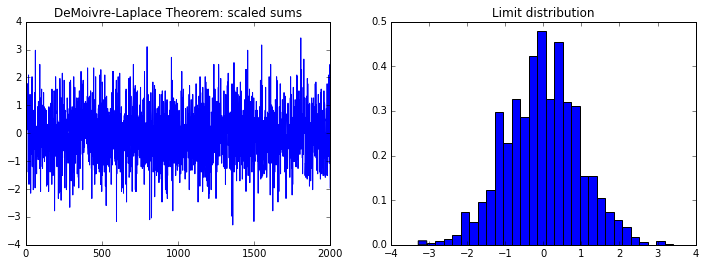

In [37]:
p = 0.5
q = 1. - p
n = 1000
m = 2000
x = bernoulli.rvs(p=p,size=n*m).reshape(n,m)
Sk = np.cumsum(x, axis=0)
k = np.arange(1,n+1)
S = np.divide(Sk.T - (k*p*np.ones((m,n))), np.sqrt(k*p*q)).T

T = -1
plt.figure(figsize=(12,4))
plt.subplot(121)
plt.title('DeMoivre-Laplace Theorem: scaled sums')
plt.plot(S[T,:])
plt.subplot(122)
plt.title('Limit distribution')
plt.hist(S[T,:], bins=30, normed=True);

In [38]:
dist = expon(loc=0,scale=1)

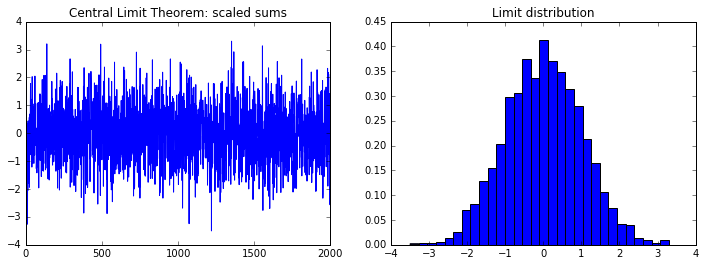

In [39]:
n = 1000
m = 2000
x = dist.rvs(size=n*m).reshape(n,m)
mu = np.mean(x)
sigma = np.std(x)
Sk = np.cumsum(x, axis=0)
k = np.arange(1,n+1)
S = np.divide(Sk.T - (k*mu*np.ones((m,n))), np.sqrt(k)*sigma).T

T = -1
plt.figure(figsize=(12,4))
plt.subplot(121)
plt.title('Central Limit Theorem: scaled sums')
plt.plot(S[T,:])
plt.subplot(122)
plt.title('Limit distribution')
plt.hist(S[T,:], bins=30, normed=True);

** Special case: Cauchy distribution**

In [40]:
dist = cauchy(loc=0,scale=1)

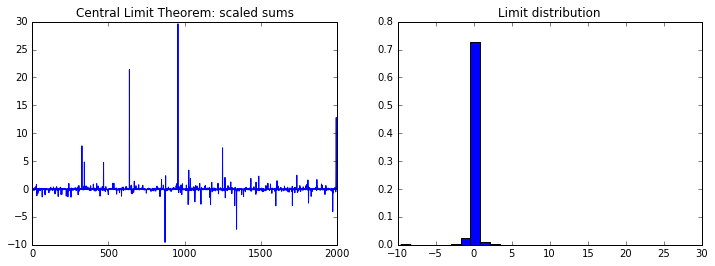

In [41]:
n = 1000
m = 2000
x = dist.rvs(size=n*m).reshape(n,m)
mu = np.mean(x)
sigma = np.std(x)
Sk = np.cumsum(x, axis=0)
k = np.arange(1,n+1)
S = np.divide(Sk.T - (k*mu*np.ones((m,n))), np.sqrt(k)*sigma).T

T = -1
plt.figure(figsize=(12,4))
plt.subplot(121)
plt.title('Central Limit Theorem: scaled sums')
plt.plot(S[T,:])
plt.subplot(122)
plt.title('Limit distribution')
plt.hist(S[T,:], bins=30,normed=True);

### Random variables simulation: Smirnov's Theorem
Let $\eta$ be a continuous r. v. with a c.d.f. $F$.

Define inverse function: $G(u)=\inf \{x: F(x)\geq u\}$,  $0 < u < 1$  inverse function for $F$: $ F(G(x))=x$,  $0<x<1$.

What is the distribution of r.v. $\xi = F(\eta)$? Notice, that $ 0\leq \xi\leq 1$. Derive the c.d.f. of $\xi$:

$H(x)=\pr\left(\xi\leq x\right)=\pr\left(F(\eta)\leq x\right)=\pr\left(\eta \leq G(x)\right)
=F(G(x))=x,\quad 0<x<1 \quad \Rightarrow\quad \xi \sim U_{[0,1]}$.

How this can be used for modeling? Let $\xi \sim U_{[0,1]}$ and $G=F^{-1}$ - inverse for some c.d.f., then $\eta=G(\xi)\sim F$.

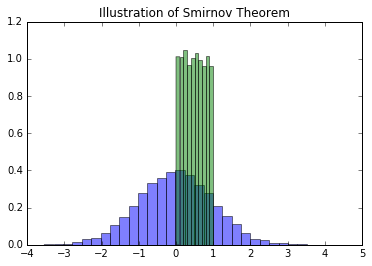

In [42]:
# Motivational example: Smirnov's theorem 
X = norm.rvs(0, 1, 10000)
U = norm.cdf(X)

plt.title('Illustration of Smirnov Theorem')
plt.hist(X, alpha=0.5,bins=30, normed=1)
plt.hist(U, alpha=0.5, normed=1)
plt.show()

**Example**
* R.v. $\xi$ has Exponential Distribution $\xi\in E_{\lambda} $ if $f(x)=\lambda e^{-\lambda x}I_{(0,+\infty)}(x)$, $F(x)=1-e^{-\lambda x}$.
* Inverse function $\displaystyle{G(y)=-\frac{1}{\lambda}\ln(1-y)}$

In [43]:
from scipy.interpolate import interp1d

In [44]:
dist = expon(loc=0, scale=1)

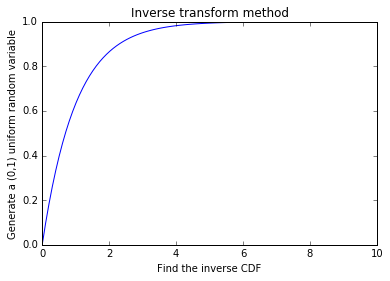

In [45]:
size = 100
a = 0
b = 10
x = np.linspace(a,b,size)
f = dist.pdf(x)
plt.plot(x, dist.cdf(x))
plt.ylabel('Generate a (0,1) uniform random variable')
plt.xlabel('Find the inverse CDF')
plt.title('Inverse transform method');

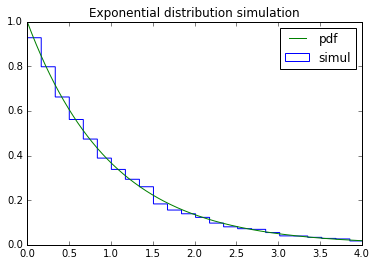

In [46]:
size = 10000
a = 0
b = 10
x = np.linspace(a,b,size)
f = dist.pdf(x)
F = np.cumsum(f)/sum(f)
F = np.insert(F,0,0)[:-1]
# easy way to do the same thing - use cumulative distribution function
#F = dist.cdf(x)
inv_cdf = interp1d(F, x, bounds_error=False, assume_sorted=True)
r = np.random.uniform(0, 1, size)
y = inv_cdf(r)

plt.title('Exponential distribution simulation')
plt.hist(y, bins=50,histtype='step', normed=True, label='simul')
plt.axis([0,4,0,1])
plt.plot(x, f,label='pdf')
plt.legend();

How to model random variable from another distribution?
* Let $\xi\sim F_{\xi}$ and $\eta \sim F_{\eta}$, then $F_{\xi}(\xi)=F_{\eta}(\eta)=Г\sim U_{[0,1]}$,
so $\xi=F_{\xi}^{-1}F_{\eta}(\eta)$.
* Let $\eta \sim f_{\eta}(y)$ and $\eta = \phi(\xi)$, $\xi = \psi(\eta)$, then $ f_{\eta}(y)=f_{\xi}\left(\psi(y)\right)|\psi^{\prime}(y)|$.

**Example**
* R.v. $\xi$ has Exponential Distribution $\xi\in E_{\lambda} $ if $f(x)=\lambda e^{-\lambda x}I_{(0,+\infty)}(x)$, $F(x)=1-e^{-\lambda x}$.

* R.v. $\xi$ has Cauchy Distribution $\xi\in {\mathcal Cauchy}$ if $f(x)=\displaystyle\frac{1}{\pi(1+x^2)}$, $F(x)=\displaystyle\frac{1}{\pi}\arctan(x)+\frac{1}{2}$.

* Let $\xi$ be exponential r.v. $p_{\xi}(x)=\lambda e^{-\lambda x}$ and $\eta$ be a Cauchy r.v. $p_{\eta}(y)=\frac{1}{\pi(1+y^2)}$. 

**How to transform $\xi$ into $\eta$?** In other words, find $\phi$.
* C.d.f.: $F_{\xi}(x)=1-e^{-\lambda x}$, $x>0$ and $F_{\eta}(y)=\frac{1}{\pi}\left(\arctg y +\frac{\pi}{2}\right)$.
* Inverse transform: $y=F_{\eta}(u)=\tg \left( \pi u - \frac{\pi}{2}\right)=-\ctg (\pi u)$.
* Then find $\phi$: $\eta = F_{\eta}^{-1}F_{\xi}(\xi)=-\ctg\left(\pi(1-e^{-\lambda \xi})\right)=\ctg\left(\pi e^{-\lambda \xi} \right)$.

**Practical example: generating gaussian mixture**

$\displaystyle{g(x)=\sum_{i=1}^mw_i\varphi_{\mu_i,\sigma_i}(x)}$, 
where weights sum to unity $\displaystyle{\sum_{i=1}^mw_i=1}$ and $\displaystyle{\varphi_{\mu,\sigma}(x)=\frac{1}{\sigma\sqrt{2\pi}}\exp\left(-\frac{(x-\mu)^2}{2\sigma^2}\right)}$

In [47]:
class gaussian_mixture(object):
    def __init__(self, p, mu, sigma):
        self.p = p
        self.mu = mu
        self.sigma = sigma
        
    def pdf(self, x, p=None, mu=None, sigma=None):
        if p is None:
            p = self.p
        if mu is None:
            mu = self.mu
        if sigma is None:
            sigma = self.sigma
        f = 0
        for b,m,s in zip(p, mu, sigma):
            f += b*np.exp(-(x - m)**2 / (2. * s**2)) / (s * np.sqrt(2.0 * np.pi))
        return f    
    
    def rvs(self, size, p=None, mu=None, sigma=None):
        if p is None:
            p = self.p
        if mu is None:
            mu = self.mu
        if sigma is None:
            sigma = self.sigma
        a = min(mu) - 3.0*max(sigma)
        b = max(mu) + 3.0*max(sigma)
        x = np.linspace(a,b,size)
        f = self.pdf(x, p, mu, sigma)
        F = np.cumsum(f)/sum(f)
        F = np.insert(F,0,0)[:-1]
        inv_cdf = interp1d(F, x, bounds_error=False, assume_sorted=True)
        r = np.random.uniform(0, 1, size)
        return inv_cdf(r)

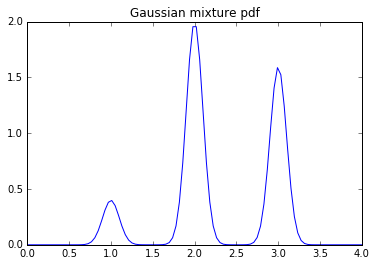

In [48]:
# define some gaussian mixture
p = [0.1,0.5,0.4]
mu = [1.,2.,3.]
sigma = [.1,.1,.1]
x = np.linspace(0,4,100)
mixt = gaussian_mixture(p=p, mu=mu, sigma=sigma)
f = mixt.pdf(x)
plt.title('Gaussian mixture pdf')
plt.plot(x, f);

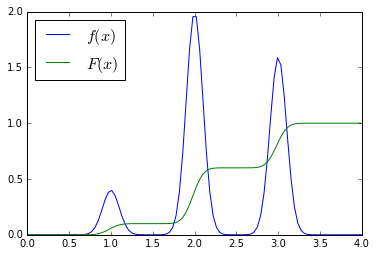

In [49]:
fig,ax=plt.subplots()
ax.plot(x,f,label='$f(x)$')
ax.plot(x,np.cumsum(f)*np.diff(x)[0],'g',label='$F(x)$')
ax.legend(loc=0,fontsize=16);

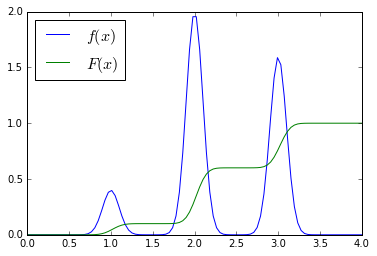

In [50]:
F = np.cumsum(f)/sum(f)
F = np.insert(F,0,0)[:-1]
fig,ax=plt.subplots()
ax.plot(x,f,label='$f(x)$')
ax.plot(x,F,'g',label='$F(x)$')
ax.legend(loc=0,fontsize=16);

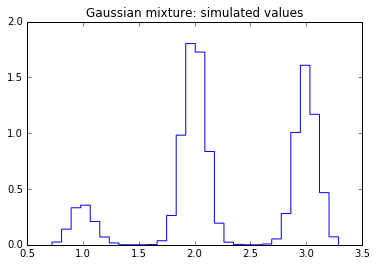

In [51]:
obs = mixt.rvs(size=10000, p=p,mu=mu,sigma=sigma)
plt.title('Gaussian mixture: simulated values')
plt.hist(obs, bins=30, histtype='step', color='blue', normed=True, linewidth=1);

### Generating Random Variables: The Acceptance-Rejection Method

Suppose, we know, how to generate random variable with density function $h(x)$. Our goal is to generate from distribution with density function $f(x)$. Let's take $Y\sim h$ and accept generated value with the probability proportional to $\displaystyle{\frac{f(Y)}{h(Y)}}$. Define $c$ as a constant: $\displaystyle{\frac{f(y)}{h(y)}\leq c}$, $\forall y$

**Algorithm**
* **STEP 1** Generate $Y\sim h$
* **STEP 2** Generate uniform random variable $U$
* **STEP 3** If $\displaystyle{U\leq\frac{f(Y)}{ch(Y)}}$, take $X=Y$, otherwise return to **STEP 1**.

In [52]:
# define some gaussian mixture
p = [1.]
mu = [0.]
sigma = [1]
x = np.linspace(-4,4,100)
mixt = gaussian_mixture(p=p, mu=mu, sigma=sigma)

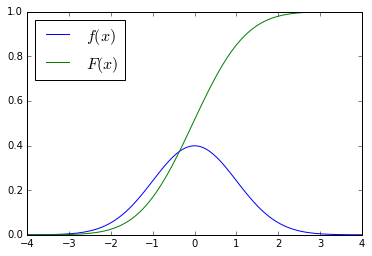

In [53]:
fig,ax=plt.subplots()
f = mixt.pdf(x)
ax.plot(x,f,label='$f(x)$')
ax.plot(x,np.cumsum(f)*np.diff(x)[0],'g',label='$F(x)$')
ax.legend(loc=0,fontsize=16);

In [54]:
def rejection_sampler(C, h, f, n):
    y = h.rvs(size=n)
    u = uniform.rvs(size=n)
    idx = np.where(u <= f.pdf(y)/C)[0] 
    v = y[idx]
    efficency = len(v)/n
    return v, efficency, y, u, idx

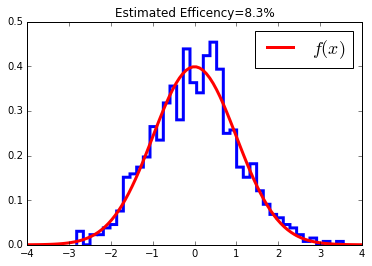

In [55]:
n = 10000
v, eff, y, u, idx = rejection_sampler(C=1.5, h=uniform(loc=-4,scale=8), f=mixt, n=n)

fig,ax=plt.subplots()
ax.hist(v,normed=1,bins=40,lw=3.,alpha=1.,histtype='step')
ax.plot(x,f,'r',lw=3.,label='$f(x)$')
ax.set_title('Estimated Efficency=%3.1f%%'%(100*eff))
ax.legend(fontsize=18);

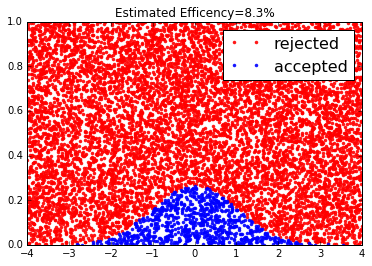

In [56]:
cmpl = np.array(list(set(np.arange(n)) - set(idx))) # idx set complement
fig,ax=plt.subplots()
ax.set_title('Estimated Efficency=%3.1f%%'%(100*eff))
ax.plot(y[cmpl],u[cmpl],'.',label='rejected',alpha=.9,color='red')
ax.plot(y[idx],u[idx],'g.',label='accepted',alpha=.9,color='blue')
ax.legend(fontsize=16);

ARM is an indirect method of r.v. generation. Let $f$ be a p.d.f., we are going to simulate. 

**Algorithm:**
* Specify a p.d.f. $h$, which is easy to simulate, and a constant $C\geq 1$, such that $C h(x)\geq f(x)$, $\forall x$.
* Represent $f(x)=C h(x) g(x)$, where $0\leq g(x) \leq 1$.
* **STEP 1.** Generate $U\sim U_{[0,1]}$.
* **STEP 2.** Generate $Y$ from $h(y)$, independent of $U$.
* **STEP 3.** If $U\leq g(Y)$ return $X=Y$. Otherwise, go to **STEP 1**.

**Explanation:**

* Bayes formula: $\displaystyle f_Y(x|U\leq g(Y))=\frac{\pr(U\leq g(Y)|Y=x)h(x)}{\pr(U\leq g(Y))}$
* Then $\displaystyle \pr(U\leq g(Y)|Y=x)=\pr(U\leq g(x))=g(x)$
* and $\displaystyle \pr(U\leq g(Y))=\int\pr(U\leq g(Y)|Y=x)h(x)dx=\int g(x)h(x)dx=\int\frac{f(x)}{C}dx=\frac{1}{C}$.
* Put the last expression into the Bayes formula to get $\displaystyle f_Y(x|U\leq g(Y))=Ch(x)g(x)=f(x)$.		

**Properties:**
* Method efficiency is determined by the acceptance probability $\displaystyle p=\pr(U\leq g(Y))=\frac{1}{C}$.
* Note, that the number $N$ of trials before a succesful pair $(U,Y)$ follows geometric distrbution: $\displaystyle \pr(N=n)=p(1-p)^{n-1}$, $n=1,2,\ldots$, and expected number of trials equal to $\frac{1}{p}=C$.
* Note: it should be easy to generate a r.v. $h(x)$.
* Note: The efficiency $\frac{1}{C}$ shouldn't be too small, which means, that $h(x)$ should be close to $f(x)$.

**Example: simulate normal distribution via ARM**

* To generate $X\sim N(a,\sigma^2)$ it suffice to generate $|Z|$, $Z\sim N(0,1)$, because having independent $U\sim U_{[0,1]}$, set $Z=|Z|$ if $U \leq \frac{1}{2}$ and set $Z=-|Z|$, if $U>\frac{1}{2}$.
* Variable $|Z|$ non-negative with density $\displaystyle f(x)=\frac{2}{\sqrt{2\pi}}e^{-\frac{x^2}{2}}$, $x\geq 0$. 
* Choose $h(x)=e^{-x}$, $x\geq 0$ - easy to simulate (using Smirnov's method).
* Denote $\displaystyle g(x)=\frac{f(x)}{h(x)}=\sqrt{\frac{2}{\pi}}e^{x-\frac{x^2}{2}}$. Solve equation $h^{\prime}(x)=0$ to find $C=\sqrt{\frac{2e}{\pi}}$, so that $\displaystyle \frac{f(x)}{Ch(x)}=e^{-\frac{(x-1)^2}{2}}$

**Algorithm: normal distributed variables generator**

The Algorithm for simulating $Z$ is
* **STEP 1.** Simulate $Y\sim E_1$: simulate $U\sim U_{[0,1]}$ and set $Y=-\ln (U)$.
* **STEP 2.** Simulate $U\sim U_{[0,1]}$.
* **STEP 3.** If $\displaystyle U\leq e^{-\frac{(Y-1)^2}{2}}$, set $|Z|=Y$, otherwise go back to **STEP 1**.
* **STEP 4.** Simulate $U\sim U_{[0,1]}$. Set $Z=|Z|$ if $U\leq \frac{1}{2}$, set $Z=-|Z|$, if $U>\frac{1}{2}$.	

Note, that in **STEP 3**, $\displaystyle U\leq e^{-\frac{(Y-1)^2}{2}}$ if and only if $-\ln(U)\geq \frac{(Y-1)^2}{2}$ and since $-\ln(U)$ is exponential at rate 1.

** Algorithm: normal variable generator (simple version)**

The Algorithm for simulating $Z$ (simplified version)

* **STEP 1.** Simulate independent exponentials at rate 1: $Y_1=-\ln(U_1)$, $Y_2=-\ln(U_2)$.
* **STEP 2.** If $Y_2\geq \frac{(Y_1-1)^2}{2}$, set $|Z|=Y_1$, otherwise go back to STEP 1.
* **STEP 3.**  Simulate $U\sim U_{[0,1]}$. Set $Z=|Z|$ if $U\leq \frac{1}{2}$, set $Z=-|Z|$, if $U>\frac{1}{2}$.	
* From the lack memory property of exponential distribution it follows, that $Y=Y_2-\frac{(Y_1-1)^2}{2}\sim E_1$, when $Y_1$ is accepted, independent of $Y_1$. This r.v. can be used to generate another normal value. 

In [57]:
def arm_step():
    u = uniform.rvs(size=3)
    y = -np.log(u[:-1])
    if y[1] >= (y[0]-1)**2/2.:
        if u[-1] <=0.5:
            return y[0]
        else:
            return -y[0]
    else:
        return None

In [58]:
def accept_reject_sampling(n):
    Z = np.zeros(n)
    i = 0
    j = 0
    while i < n:
        j +=1
        z = arm_step()
        if z is not None:
            Z[i] = z
            i+=1
    return Z, i/j

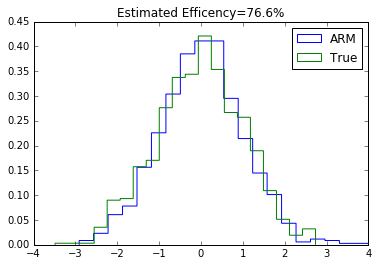

In [59]:
n = 1000
z, eff = accept_reject_sampling(n)
x = norm.rvs(size=n)

plt.title('Estimated Efficency=%3.1f%%'%(100*eff))
plt.hist(z,bins=20, histtype='step',normed=True,label='ARM')
plt.hist(x,bins=20, histtype='step',normed=True,label='True')
plt.legend();

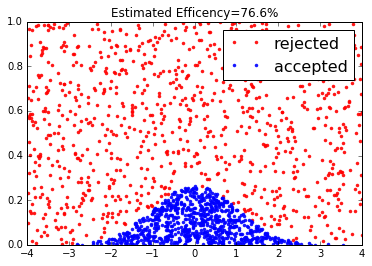

In [60]:
cmpl = np.array(list(set(np.arange(n)) - set(idx))) # idx set complement
fig,ax=plt.subplots()
ax.set_title('Estimated Efficency=%3.1f%%'%(100*eff))
ax.plot(y[cmpl],u[cmpl],'.',label='rejected',alpha=.9,color='red')
ax.plot(y[idx],u[idx],'g.',label='accepted',alpha=.9,color='blue')
ax.legend(fontsize=16);

### The Multivariate Normal Distribution
Let $Z_1,\ldots,Z_m\sim N(0,1)$, $\mathbf{Z}=(Z_1,\ldots,Z_m)$, define constants $a_{ij}$, $i=1,\ldots,n$, $j=1,\ldots,m$ and $\mu_i$, $i=1,\ldots,n$, and let 

$\displaystyle{
\begin{array}{l}
X_1=a_{11}Z_1+a_{12}Z_2+\cdots+a_{1m}Z_m+\mu_1\\
\cdots\\
X_i=a_{i1}Z_1+a_{i2}Z_2+\cdots+a_{im}Z_m+\mu_i\\
\cdots\\
X_n=a_{n1}Z_1+a_{n2}Z_2+\cdots+a_{nm}Z_m+\mu_n\\
\end{array}}$

then random vector $\X=(X_1,\ldots,X_n)$ is said to have a multivariate normal distribution

Let's write down the moments of $\X$: 
* $\displaystyle{\E\X=\mathbf{\mu}=(\mu_1,\ldots,\mu_n)}$
* $\displaystyle{\cov(X_i,X_j)=\sum_{k=1}^ma_{ik}a_{jk}}$

Denote $\mathbf{A}=\{a_{ij}\}\in \R^{n\times m}$ and write an expression for $\X$ in a vector form: $\displaystyle{\X^T=\mathbf{A}\mathbf{Z}^T+\mu^T}$

So, the covariance matrix $\mathbf{C}=\mathbf{A}\mathbf{A}^T$ and we can get $\mathbf{A}$ from $\mathbf{C}$ via Cholesky decomposition.

### How to generate covariance and correlation matrices?

**Generating covariance matrix** $\displaystyle{\mathbf{P}\in \R^{m\times m}}$

* Generate random $\displaystyle{\S\in \R^{k, m}}$, for $k>m$;
* Take $\displaystyle{\mathbf{P}=\S^T\S}$

**Generating correlation matrix** $\displaystyle{\mathbf{P}\in \R^{m\times m}}$

* Generate random $\displaystyle{\S\in \R^{k, m}}$, for $k>m$;
* Scale $S$ (center and standardize);
* Take $\displaystyle{\mathbf{P}=\frac{1}{k}\S^T\S}$

In [61]:
from sklearn import preprocessing
# settings
m = 2
k = m + 1
#generate correlation matrix
P = np.random.uniform(0, 1, m * k).reshape(k, m)
P = preprocessing.scale(P)
P = np.dot(P.T, P) / k
P

array([[ 1.        , -0.98924348],
       [-0.98924348,  1.        ]])

**How to check positive-definetness?** 
Let $A$ be a positive definite matrix $\displaystyle{x^TAx\geq 0}$, $\forall x$, then all its eigenvalues are non-negative:
$\displaystyle{Av=\lambda v}$, let $x$ be an eigenvector of $A$, then $\displaystyle{x^TAx=\lambda x^Tx > 0 \Rightarrow x^TAx>0 \Rightarrow \lambda>0}$

In [62]:
# check positive definetness
np.linalg.eigvals(P)

array([ 1.98924348,  0.01075652])

In [63]:
# Cholesky decomposition of P
from scipy.linalg import cholesky
L = cholesky(P, lower=True)
print(L)

[[ 1.          0.        ]
 [-0.98924348  0.14627826]]


In [64]:
# check decomposition
np.dot(L, L.T)

array([[ 1.        , -0.98924348],
       [-0.98924348,  1.        ]])

In [65]:
import seaborn as sns

In [66]:
#generate correlation matrix
P = np.random.uniform(0, 1, m * k).reshape(k, m)
P = preprocessing.scale(P)
P = np.dot(P.T, P) / k
P

array([[ 1.        , -0.97642761],
       [-0.97642761,  1.        ]])

In [67]:
#generate covariance matrix
P = np.random.uniform(0, 1, m * k).reshape(k, m)
P = np.dot(P.T, P)
P

array([[ 1.09728674,  0.41432616],
       [ 0.41432616,  0.42175171]])

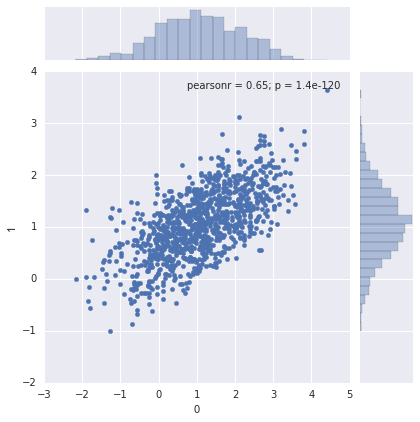

In [68]:
# simulate multivariate normal with P
n = 1000
m = 2
A = cholesky(P, lower=True)
Z = norm.rvs(size=m*n).reshape(n,m)
mu = np.ones(m)
X = np.dot(A, Z.T) + mu[:,np.newaxis]

df = pd.DataFrame(X.T)

sns.jointplot(df[0], df[1], kind='scatter');

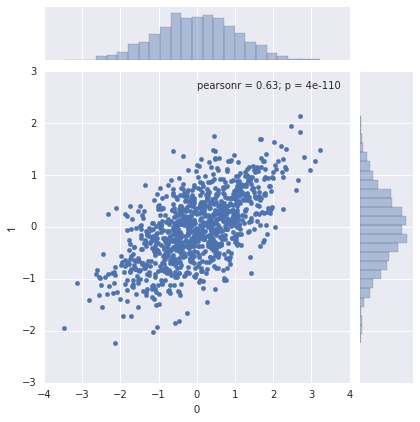

In [69]:
# simulate multivariate normal with P0
from scipy.stats import multivariate_normal
rv = multivariate_normal([0, 0], P)
W = np.zeros((n, 2))
for i in range(0, n):
    W[i,] = rv.rvs()
dfW = pd.DataFrame(W)

sns.jointplot(dfW[0], dfW[1], kind='scatter');

## Independence

**Independent Events**
* Events $A$ and $B$ are independent, if $\pr(AB)=\pr(A)\pr(B)$.
* Pairwise independence: $\forall A_i, A_j \in \{A_k\}, \pr(A_i A_j)=\pr(A_i)\pr(A_j)$.
* Jointly indendent events: $\forall k=1,\ldots,n$ and $1\leq i_1<i_2<\ldots<i_k\leq n$, $\pr(A_{i_1}\ldots A_{i_k})=\pr(A_{i_1})\ldots\pr(A_{i_k})$.

**Pairwise and Jointly Independent Events**

Let $\Omega=\{\omega_1, \omega_2,\omega_3,\omega_4\}$ and $A=\{\omega_1, \omega_2\}$, $B=\{\omega_1, \omega_3\}$, $C=\{\omega_1, \omega_4\}$ be pairwise independent, but $\pr(ABC)=\frac{1}{4}\neq(\frac{1}{2})^3=\pr(A)\pr(B)\pr(C)$ (Bernstain's pyramid example).

On the other hand, $\pr(ABC)=\pr(A)\pr(B)\pr(C)$ doesn't imply pairwise independence!

**Dependence Measures**
How to ``measure'' dependence bertween r.v.? 

* Pearson's correlation coeffitient $\displaystyle\rho(X,Y)=\frac{\E\left((X-\E X)(Y-\E Y)\right)}{\sigma_X \sigma_Y}$.
* Let $X, Y$ be normal r.v., then $X, Y$ dependent $\Leftrightarrow$ $X, Y$ correlated.
* Let $U\in U_{[0,2\pi]}$ and $X=\sin U$, $Y=\cos U$, then $X, Y$ are dependent, but not correlated.
* How to measure dependence of non-normal distributed r.v.?
* How to measure non-linear dependence?

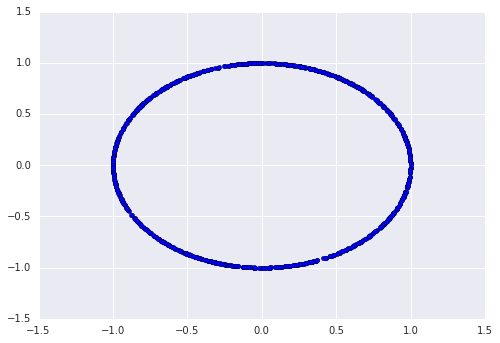

In [70]:
n = 1000
u = uniform(loc=0,scale=2*np.pi).rvs(size=n)
X = np.sin(u)
Y = np.cos(u)
plt.scatter(X,Y);

In [71]:
np.cov(X,Y)

array([[ 0.48749266,  0.00913786],
       [ 0.00913786,  0.51266534]])

**What is a *good* dependence measure? **

* Invariant to monotonic transformations.
* Has the only minimum in case of independence.
* Doesn't depend on marginal distributions.

**Dependence and marginal distributions with dices**

* Two dices $X_1, X_2 =\{1,2,3,4,5,6 \},X_1 \sim F_1, X_2 \sim F_2, F_1\equiv F_2\equiv F$.
* Let $X_{(1)}=\min\{ X_1, X_2\}$ and $X_{(2)}=\max\{ X_1, X_2\}$.
* Marginal distributions $F_{(1)}(x)=2F(x)-F^2(x)$ and $F_{(2)}(x)=F^2(x)$.
* Joint distribution depends on marking dice $\pr \left( X_{(1)} \le x_1, X_{(2)} \le x_2\right)=2F\left(\min\{x_1,x_2 \}\right)F(x_2)-F^2\left(\min\{x_1,x_2 \} \right)$.
* Use Smirnov's transformation $X \sim F \Rightarrow F(X) \sim U[0,1], X=F^-(U), U \sim U[0,1]$.
* Uniform marginal distributions $\pr \left( X_1 \le x_1, X_2 \le x_2\right)=\pr \left( F_1^-(U_1) \le x_1, F_2^-(U_2) \le x_2\right)=\pr \left( U_1 \le F_1(x_1), U_2 \le F_2(x_2)\right)$.
* *Extract* dependence structure $\displaystyle C(u_1,u_2)=2\min\{ 1-\sqrt{1-u_1},\sqrt{u_2}\}\cdot \sqrt{u_2}-\min\{ 1-\sqrt{1-u_1},\sqrt{u_2}\}^2$.

Comment:
* Let $\min(x_1,x_2)=x_2$, then $\displaystyle{\pr\left(X_{(1)}\leq x_1 \middle| \enspace X_{(2)}\leq x_2\right)=1}$ and $\displaystyle{\pr(X_{(1)}\leq x_1,X_{(2)}\leq x_2)=\pr\left(X_{(1)}\leq x_1 \middle| \enspace X_{(2)}\leq x_2\right)\pr(X_{(2)}\leq x_2)=\pr(X_{(2)}\leq x_2)=F^2(x_2)}$
* Let $\min(x_1,x_2)=x_1$, then 

In [72]:
xk = np.arange(1,7)
pk = np.ones(6)/6
dice = rv_discrete(name='dice', values=(xk, pk))

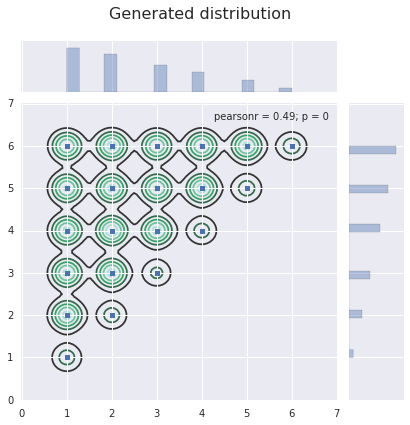

In [73]:
n = 10000
X = dice.rvs(size=n*2).reshape(n,2)
X1 = np.min(X,axis=1)
X2 = np.max(X,axis=1)

sns.jointplot(X1, X2, kind='scatter').plot_joint(sns.kdeplot, zorder=0, n_levels=5)
sns.plt.subplots_adjust(top=0.9)
sns.plt.suptitle('Generated distribution', size=16);

In [74]:
@np.vectorize
def dice_copula(u, v):
    return 2.*min(1.-np.sqrt(1.-u),np.sqrt(v))*np.sqrt(v)-min(1.-np.sqrt(1.-u),np.sqrt(v))**2

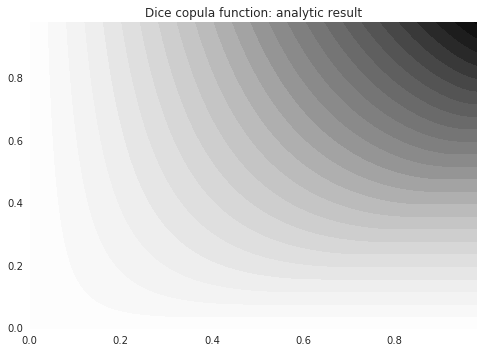

In [75]:
delta = 0.01
x = np.arange(.001, 0.99, delta)
y = np.arange(.001, 0.99, delta)
X, Y = np.meshgrid(x, y)
Z = dice_copula(X, Y)

plt.title('Dice copula function: analytic result')
plt.contourf(X, Y, Z, 30);

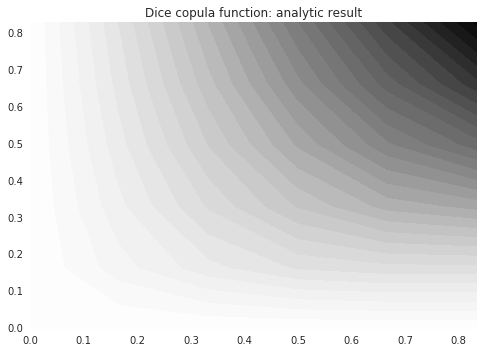

In [76]:
delta = 1./6.
x = np.arange(.0, 1., delta)
y = np.arange(.0, 1., delta)
X, Y = np.meshgrid(x, y)
Z = dice_copula(X, Y)

plt.title('Dice copula function: analytic result')
plt.contourf(X, Y, Z, 30);

### Copulas
**Copula definition**

* Probabilistic definition: copula is a multidimensional distribution with uniform marginals: let $U_1,\ldots, U_n\sim U_{[0,1]}$, copula is a function $C:[0,1]^n\rightarrow [0,1]$. $C_{\theta}(u_1,\ldots,u_n)=\pr(U_1
\leq u_1,\ldots, U_n\leq u_n)$.
* It is exactly the function, constructed in dice example: $\displaystyle C(u_1,u_2)=2\min\{ 1-\sqrt{1-u_1},\sqrt{u_2}\}\cdot \sqrt{u_2}-\min\{ 1-\sqrt{1-u_1},\sqrt{u_2}\}^2$

**Sklar's theorem (1959)**

Let $H$ be a joint distribution function with margins $F$ and $G$. 

* Then there exists a copula $C$ such that $\forall x, y \in \overline{\R}$, $H(x,y)=C(F(x),G(y))$.	
* If $F$ and $G$ are continuous, then $C$ is unique; otherwise, $C$ is uniquely determined on $Ran(F)\times Ran(G)$.
* Conversely, if $C$ is a copula and $F$ and $G$ are distribution functions, then $H(x,y)=C(F(x),G(y))$ is a joint distribution function with margins $F$ and $G$.

**Gumbel's bivariate logistic**

* Joint distribution function: $\displaystyle F(x_1,x_2)=\left( 1+ e^{-x_1} +e^{-x_2}\right)^{-1}$.
* Marginal distributions: $\displaystyle F_1(x_1)=\int_{\R}F(x_1,x_2)d x_2=\left(1+e^{-x_1} \right)^{-1}$ and $F_2(x_2)=\left(1+e^{-x_2} \right)^{-1}$.
* Inverse functions: $\displaystyle F_1^-(u)=F_2^-(u)=-\ln\left( u^{-1} -1 \right)$.
* From Sklar's theorem follows: $\displaystyle C(u,v)=F\left( F_1^-(u_1),F_2^-(u_2) \right)=\frac{u_1u_2}{u_1+u_2-u_1u_2}$.

In [77]:
@np.vectorize
def joint_dist(x,y):
    return 1./(1 + np.exp(-x) + np.exp(-y))

In [78]:
@np.vectorize
def margin_dist(x):
    return 1./(1 + np.exp(-x))

In [79]:
@np.vectorize
def inv_dist(u):
    return -np.log(1./u-1)

In [80]:
@np.vectorize
def sample_copula(u, v):
    return joint_dist(inv_dist(u), inv_dist(v))

In [81]:
@np.vectorize
def gumb_copula(u,v):
    return (u*v)/(u+v-u*v)

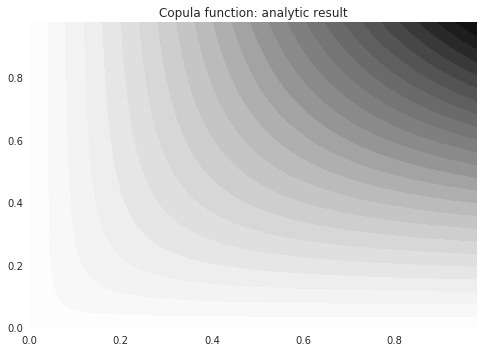

In [82]:
delta = 0.01
x = np.arange(.001, 0.99, delta)
y = np.arange(.001, 0.99, delta)
X, Y = np.meshgrid(x, y)
Z = gumb_copula(X, Y)

plt.title('Copula function: analytic result')
plt.contourf(X, Y, Z, 30);

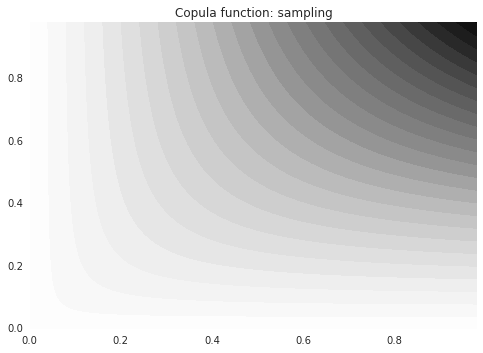

In [83]:
delta = 0.01
x = np.arange(.001, 0.99, delta)
y = np.arange(.001, 0.99, delta)
X, Y = np.meshgrid(x, y)
Z = sample_copula(X, Y)

plt.title('Copula function: sampling')
plt.contourf(X, Y, Z, 30);

**Another distribution with the same copula**

* Joint distribution $\displaystyle F(x_1,x_2)=\left\{ \begin{array}{ll}
			\frac{(x_1+1)(e^{x_2}-1)}{x_1+2e^{x_2}-1}, & (x_1,x_2)\in [-1,1]\times [0,+\infty);\\
			1-e^{x_2}, & (x_1,x_2)\in [1,+\infty)\times [0,+\infty);\\
			0, & \mbox{else}.
			\end{array}\right.$
* Marginals: $\displaystyle{ F_1(x_1)=\left\{ \begin{array}{ll}
			0, & x_1\in (-\infty,-1);\\
			\frac{x_1+1}{2}, & x_1\in [-1,1];\\
			1, & x_1\in (1,+\infty).
			\end{array}\right.}$, 
*            $\displaystyle{ F_2(x_2)=\left\{ \begin{array}{ll}
			0, & x_2\in (-\infty,0);\\
			1-e^{-x_2}, & x_2\in [0,+\infty).
			\end{array}\right.}$
* Inverse functions: $F_1^-(u)=-2u-1$, $F_2^-(v)=-\ln\left( 1-v \right)$.
* From Sklar's theorem follows $\displaystyle C(u,v)=F\left( F_1^-(u_1),F_2^-(u_2) \right)=\frac{u_1u_2}{u_1+u_2-u_1u_2}$.

**Multivariate Normal Copula**

* Copula function $C(u_1,\ldots,u_n;\rho)=\Phi_{\rho}\left( \Phi^-(u_1),\ldots, \Phi^-(u_n) \right)$, $\rho = \left(\begin{array}{cc}
			\rho_1 & \rho_{12}\\
			\rho_{12}&\rho_2
			\end{array}\right)$.
* Copula density $\displaystyle c(u_1,\ldots,u_n;\rho)=|\rho|^{-\frac{1}{2}}\exp\left( -\frac{1}{2}\xi^T (\rho^{-1}-\I)\xi \right)$
* Conditional density $\displaystyle c\left(U_2|U_1;\rho \right)=|\rho_{22}-\rho_{12}^T\rho_{11}^{-1}\rho_{12}|^{-\frac{1}{2}}\exp\left( -\frac{1}{2}\xi^T\left([ \rho_{22}-\rho_{12}^T\rho_{11}^{-1}\rho_{12} ]^{-1}-\I \right) \xi\right)$.
* Simulation formula $\xi=\Phi^-(U_2)-\rho_{12}^T\rho_{11}^{-1}\Phi^-(U_1)$.

In [84]:
#generate covariance matrix
P = np.random.uniform(0, 1, m * k).reshape(k, m)
P = np.dot(P.T, P)
P

array([[ 0.52751058,  0.58568614],
       [ 0.58568614,  1.05741966]])

In [85]:
#generate correlation matrix
P = np.random.uniform(0, 1, m * k).reshape(k, m)
P = preprocessing.scale(P)
P = np.dot(P.T, P) / k
P

array([[ 1.        ,  0.40847308],
       [ 0.40847308,  1.        ]])

In [86]:
# Cholesky decomposition of P
L = cholesky(P, lower=True)
print(L)

[[ 1.          0.        ]
 [ 0.40847308  0.91277037]]


In [87]:
# simulation loop (gaussian copula)
U = np.zeros((n, m))
for i in range(0, n):
    Z = np.random.normal(0, 1, m)
    X = np.dot(L, Z)
    U[i,] = norm.cdf(X)

In [88]:
# simulation loop (gaussian copula) - easy way
U = np.zeros((n, m))
for i in range(0, n):
    Z = multivariate_normal.rvs(np.zeros(m), P)
    U[i,] = norm.cdf(Z)

In [89]:
# simulation loop (t-copula)
nu = 1
U = np.zeros((n, m))
for i in range(0, n):
    c = chi2.rvs(nu, size=1) / nu
    Z = multivariate_normal.rvs(np.zeros(m), P)
    X = Z / np.sqrt(c)
    U[i,] = t.cdf(X, nu)

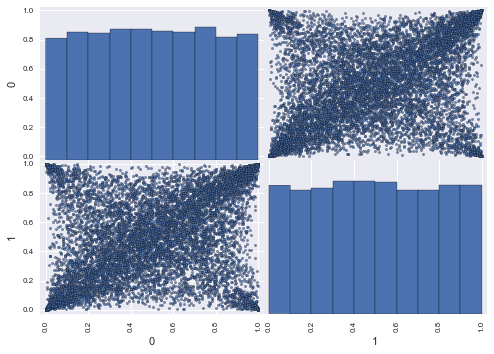

In [90]:
# scatter matrix plot for U
from pandas.tools.plotting import scatter_matrix
df = pd.DataFrame(U)
scatter_matrix(df, alpha=0.8, diagonal='hist')
plt.show()

In [91]:
# dependent normal r.v. simulation
V = np.zeros((n, m))
for i in range(0, n):
    V[i,] = norm.ppf(U[i,])

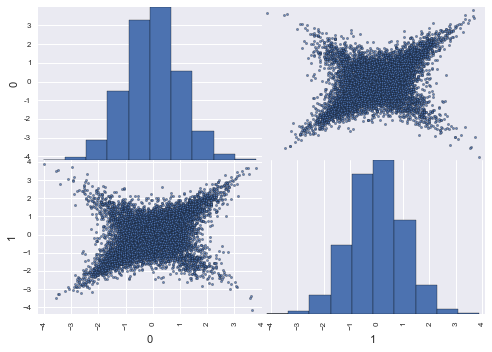

In [92]:
# scatter matrix plot for V
dfV = pd.DataFrame(V)
scatter_matrix(dfV, alpha=0.8, diagonal='hist')
plt.show()

**Copula density**
* Differentiate copula function to get density function: $\displaystyle c(u,v)=\frac{\partial^2 C(u,v)}{\partial u \partial v}=\frac{\frac{\partial^2 F(x,y)}{\partial x \partial y}}{\frac{\partial F_1}{\partial x}\frac{\partial F_2}{\partial y}}=\frac{f(x,y)}{f_1(x)f_2(y)}$.
* Joint density function $\displaystyle f(x,y)=c\left(F_1(x),F_2(y) \right)f_1(x)f_2(y)$. 

**Conditional copula**
* Conditional distribution $\displaystyle \pr \left(V \le v | U = u \right)=\frac{\partial C(u,v)}{\partial u}$.
* Conditional copula $\displaystyle{ C_k \left(u_k | u_1,\ldots,u_{k-1} \right)=\pr\left(U_k \le u_k | U_1 = u_1,\ldots, U_{k-1}=u_{k-1} \right)=\frac{\frac{\partial^{k-1}C_k(u_1,\ldots,u_k)}{\partial u_1\cdots\partial u_{k-1}}}{\frac{\partial^{k-1}C_{k-1}(u_1,\ldots,u_{k-1})}{\partial u_1\cdots\partial u_{k-1}}}}$

** Copulas and random variables simulation**

* Simulate $u_1 \sim U[0,1]$.
* Simulate $u_2 \sim C_2(\cdot|u_1)$.
* Simulate ...
* Simulate $u_n \sim C_n(\cdot|u_1,\ldots,u_{n-1})$

**Random variables generation using copula: example**
* Let the copula $\displaystyle C(u,v)=(u^{-\theta}+v^{-\theta}-1)^{-\frac{1}{\theta}}$, $\theta>0$.
* Then $\displaystyle C_{2|1}(v|u)=\frac{\partial C}{\partial u}(u,v)=-\frac{1}{\theta}(u^{-\theta}+v^{-\theta}-1)^{-\frac{1}{\theta}-1}(-\theta u^{-\theta-1})=
			(u^{\theta})^{-\frac{1+\theta}{\theta}}(u^{-\theta}+v^{-\theta}-1)^{-\frac{1}{\theta}-1}=(1+u^{\theta}(v^{-\theta}-1))^{-\frac{1+\theta}{\theta}}$.
* Solve the equation $q=C_{2|1}(v|u)$ for $v$ to get: $\displaystyle C_{2|1}^{-1}(q|u)=v=((q^{-\frac{\theta}{1+\theta}}-1)u^{-\theta}+1)^{-\frac{1}{\theta}}$.
* Simulate independent $u$ and $q$ from $U_{[0,1]}$.
* Set $\displaystyle v=((q^{-\frac{\theta}{1+\theta}}-1)u^{-\theta}+1)^{-\frac{1}{\theta}}$.

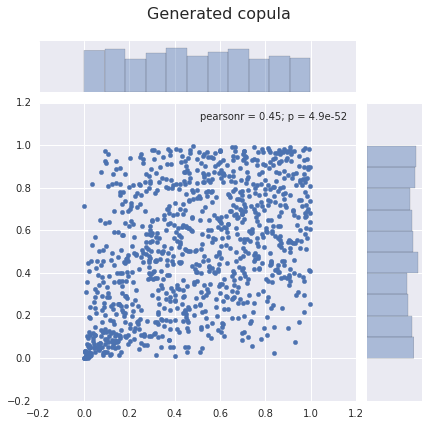

In [93]:
n = 1000
theta = 1.
u = uniform.rvs(size=n)
q = uniform.rvs(size=n)
v = ((q**(-theta/(1.+theta))-1.)*u**(-theta)+1)**(-1./theta)

sns.jointplot(u, v, kind='scatter')
sns.plt.subplots_adjust(top=0.9)
sns.plt.suptitle('Generated copula', size=16);

**Random variables generation using copula: example**
* Joint distribution $F(x_1,x_2)=\left\{ \begin{array}{ll}
			\frac{(x_1+1)(e^{x_2}-1)}{x_1+2e^{x_2}-1}, & (x_1,x_2)\in [-1,1]\times [0,+\infty);\\
			1-e^{x_2}, & (x_1,x_2)\in [1,+\infty)\times [0,+\infty);\\
			0, & \mbox{else}.
			\end{array}\right.$
* Copula $C(u,v)=F\left( F_1^-(u_1),F_2^-(u_2) \right)=\frac{u_1u_2}{u_1+u_2-u_1u_2}$.
* Conditional distribution $\displaystyle \pr \left(V \le v | U = u \right)=\frac{\partial C(u,v)}{\partial u}=c_u(v)=\left(\frac{v}{u+v-uv} \right)^2$.
* Inverse function $c_u^-(t)=\frac{u\sqrt{t}}{1-(1-u)\sqrt{t}}$.
* Simulate $u,t \sim U[0,1]$.
* Set $v=\frac{u\sqrt{t}}{1-(1-u)\sqrt{t}}$.
* Simulated values: $x=2u-1$, $y = -\ln(1-v)$, $(x,y) \sim F$.

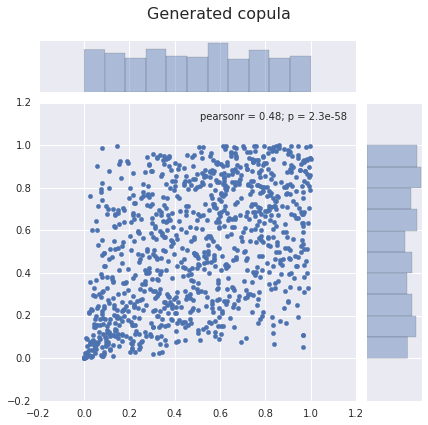

In [94]:
n = 1000
u = uniform.rvs(size=n)
t = uniform.rvs(size=n)
v = u*np.sqrt(t)/(1.-(1. - u)*np.sqrt(t))

sns.jointplot(u, v, kind='scatter')
sns.plt.subplots_adjust(top=0.9)
sns.plt.suptitle('Generated copula', size=16);

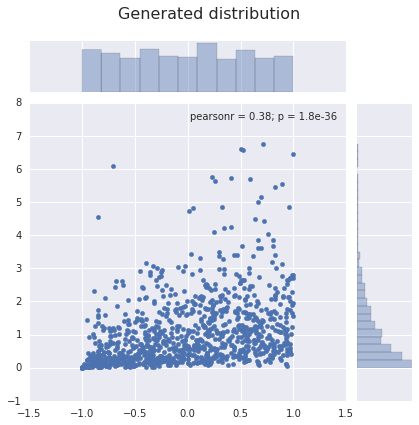

In [95]:
x = 2*u -1.
y = -np.log(1-v)

sns.jointplot(x, y, kind='scatter')
sns.plt.subplots_adjust(top=0.9)
sns.plt.suptitle('Generated distribution', size=16);

**Empirical copula**

* Sample ${\mathcal X}=\{(x_1^t,\ldots,x_n^t) \}_{t=1}^T$.
* Empirical copula $\displaystyle\hat{C}\left(\frac{t_1}{T},\ldots,\frac{t_n}{T} \right)=\frac{1}{T}\sum_{t=1}^T\I_{\{ x_1^t\le x_1^{(t_1)},\ldots,x_n^t\le x_n^{(t_n)} \}}$, $1\le t_1,\ldots,t_n\le T$.
* Empirical copula density $\hat{c}\left(\frac{t_1}{T},\ldots,\frac{t_n}{T} \right)=\left\{\begin{array}{ll}
			\frac{1}{T}, & (x_1^{(t_1)},\ldots,x_n^{(t_n)}) \in {\mathcal X}\\
			0, & \mbox{else}.
			\end{array}\right.$
* Empirical copula and it's density $\displaystyle \hat{C}\left(\frac{t_1}{T},\ldots,\frac{t_n}{T} \right)=\sum_{i_1=1}^{t_1}\cdots \sum_{i_n=1}^{t_n}\hat{c}\left(\frac{i_1}{T},\ldots,\frac{i_n}{T} \right)$. 

In [96]:
def ranks(x):
    idx = x.argsort()
    rank = np.zeros(len(x))
    rank[idx] = np.arange(len(x))
    return rank

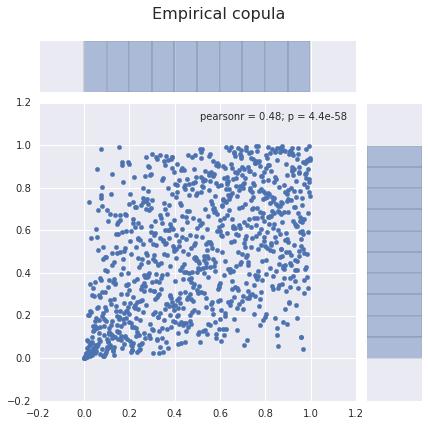

In [97]:
Rx = ranks(x)/(len(x) + 1.)
Ry = ranks(y)/(len(y) + 1.)

sns.jointplot(Rx, Ry, kind='scatter')
sns.plt.subplots_adjust(top=0.9)
sns.plt.suptitle('Empirical copula', size=16);

** Copula and Pearson's correlation**

* Pearson's correlation for standardized r.v. $\rho(X,Y)=\int\int x y \phi(x,y)dx dy$
* Copula-based expression $\displaystyle \rho(X,Y)=\int_{[0,1]^2}c(u,v)F_X^{-1}(u)F_Y^{-1}(v) d u d v$
* Note: copula can be chosen such that $\rho=0$, while $c(u,v)\neq 1$.
* Pearson's correlation depends on marginals.

**Copula and rank Pearson's correlation**

* Define ranks: $R_i=rank(x_i)$, $S_i=rank(y_i)$. Pearson's rank correlation $\displaystyle \rho(R,S)=\frac{\sum_i(R_i-\overline{R})(S_i-\overline{S})}{\sqrt{\sum_i(R_i-\overline{R})^2\sum_i(S_i-\overline{S})}}$
* Copula-based expression $\rho=12\int\int_{[0,1]^2}u v c(u,v) d u d v -3$ doesn't depend on marginals!

**Copula and Kendall's concordance**

* Define number of concordant pairs $c=\sharp\{(i,j):(x_i-x_j)(y_i-y_j)>0\}$ and the number of discordant pairs $d=\sharp\{(i,j):(x_i-x_j)(y_i-y_j)<0\}$.
* Concordance coefficient $\tau=2\frac{c-d}{n(n-1)}$.
* In terms of copulas: $\tau=4\iint_{[0,1]^2}C(u,v)d C(u,v)$.

### Entropy

**How to describe information, contained in an experiment?**

* Consider a random experiment, described via random vector $X=(X_1,\ldots,X_n)$ with p.d.f. $f$. All information about the experiment is contained in $f$.
* How to characterize this information with a few values? Use expectation and covariance matrix.
* Shannon entropy is another way to measure information: it characterizes the average amount of bits needed to transmit a message $X$ over a communication channel.
* Statistical approach to measure information: how much information about parameters $\theta$ of distribution $F_{\theta}$ is contained in the data $X$? Different approaches: maximum likelihood, Fisher information matrix.
* Amount of information can also be quantified via distance concept: distance between distributions, described by Kullback-Leibler divergence (or cross-entropy).

**How to define entropy?**

* Let $\xi$ be a discrete r.v.: $p_k=\pr(\xi=x_k)$, $0\leq p_k\leq 1$, $\displaystyle\sum_{k=-K}^K p_k=1$.
* If $p_k=1$, then $\{\xi=x_k\}$ has no information at all.
* If $p_k$ is *small*, then $\{\xi=x_k\}$ carry a lot of information.
* Define an *information volume* of event $\{\xi=x_k\}$, having probability $p_k$ as $\displaystyle I(x_k)=\log(\frac{1}{p_k})=-\log p_k$

**Information volume properties**

* $I(x_k)=0$ if $p_k=1$. $I(x_k)\geq 0$ if $0\leq p_k\leq 1$.
* $I(x_k)>I(x_m)$ if $p_k<p_m$.

**Entropy of discrete random variable**

Entropy is an expected information volume: $\displaystyle H(X)=\E(I(x_k))=\sum_{k=_k}^K p_kI(x_k)=-\sum_{k=-K}^K p_k\log p_k$.

**Why logarithm?**

Let $m$ and $n$ be numbers of outcomes for two random experiments. Joint number of outcomes equals $m n$. How should the uncertainty measure grow?
Uncertainties must be added: $H(m n)=H(m)+ H(n)$. This means, that $H$ is a logarithmic function. 

**Strong Law of Large Numbers**

Let $\{\xi_i\}_{i=1}^{\infty}$ be i.i.d. with $\E\xi_i=\mu<\infty$, define $S_n=\displaystyle\frac{1}{n}\sum_{i=1}^n\xi_i$ then $\displaystyle\pr\left(\lim_{n\rightarrow \infty}S_n= \mu\right)=1$ a.s.


**Shannon's theorem**

Let $\xi_1, \xi_2,\ldots \in \{1,\ldots,r\}$ -- i.i.d. with distribution $\pr\left(\xi_i=k\right)=p_k$, $1\leq k\leq r$. What is the probability to observe the exact sequence from this distribution? Denote $\pi_n\left(\omega \right)=p\left(\xi_1\left(\omega\right)\right)p\left(\xi_2\left(\omega\right)\right)\ldots p\left(\xi_n\left(\omega\right)\right)$, then  
		$\log \pi_n\left(\omega\right)=\sum_{i=1}^n \eta_i$. It follows from SLLN, that $\displaystyle-\frac{1}{n}\log\pi_n\left(\omega\right) \rightarrow H \equiv -\sum_{k=1}^r p_k\log p_k$ a.s.

In [98]:
xk = np.arange(1,7)
pk = np.ones(6)/6
dice = rv_discrete(name='dice', values=(xk, pk))

In [99]:
def entropy(p):
    return -(p*np.log2(p)).sum()

In [100]:
# entropy according to definition
entropy(pk)

2.5849625007211561

In [101]:
# limit value coinsides with current
-np.log2(1./6.)    

2.5849625007211561

**Example: guessing numbers**

Suppose you have to guess a number from the set $\{1,\ldots,2^N\}$. How many guesses do you need?
Minimum number of questions equals entropy: $\displaystyle H=-\sum_{k=1}^{2^N}p_k\log p_k=N$, where $\displaystyle p_k=\frac{1}{2^N}$ $\forall k$.

In [102]:
n = 3

In [103]:
xk = np.arange(2**n)
pk = np.ones(2**n)/2**n
guessed_number = rv_discrete(name='guessed_number', values=(xk, pk))

In [104]:
X = guessed_number.rvs(size=10)

In [105]:
def guesser(values, item):
    found = False
    left = 0
    right = len(values)-1
    steps = 0
    #print('***')
    while left<=right and not found:
        steps +=1
        midpoint = (left+right)//2
        #print(left, midpoint, right)
        if values[midpoint] == item:
            found = True
        else:
            if item < values[midpoint]:
                right = midpoint - 1
            else:
                left = midpoint + 1
    if not found:
        steps = np.inf
    return steps

In [106]:
np.array([guesser(xk, x) for x in X])

array([3, 3, 3, 2, 3, 2, 1, 4, 3, 3])

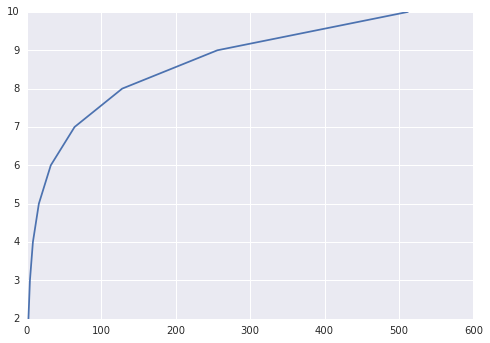

In [107]:
s = []
for i in range(1,10):
    xk = np.arange(2**i)
    pk = np.ones(2**i)/2**i
    guessed_number = rv_discrete(name='guessed_number', values=(xk, pk))
    X = guessed_number.rvs(size=1000)
    steps = np.array([guesser(xk, x) for x in X])
    s.append(np.max(steps))
s = np.array(s)

l = np.array([2**i for i in range(1,10)])
plt.plot(l, s);
#plt.xticks(l);

**Entropy: Discrete Distributions**

Let $\xi: \pr\left(\xi=x_k \right)=p_k$, then $H\left(\xi\right) = -\sum_k p_k \log p_k$

**Differential Entropy: Continuous Distributions**

In case of absolutely continuous r.v. $h\left(\xi\right) = -\displaystyle\int_D f(x) \log f(x) d x$, 
where $D=\{x:f(x)>0\}$.

**Entropy and differential entropy**

Consider continuous r.v. $X$ with p.d.f. $f$. Inroduce a discretization: $\pr(X\in[x_k, x_k+\delta x])=f(x_k)\delta x$ and write the entropy of $X$: 
$\displaystyle H(X)=-\lim_{\delta x\rightarrow 0}\left(\sum_{k=-\infty}^{\infty}f(x_k)\log(f(x_k)\delta x)+\log\delta x\sum_{k=-\infty}^{\infty}f(x_k)\delta x\right)=
-\int_{-\infty}^{\infty}f(x)\log f(x)d x-\lim_{\delta x \rightarrow 0}\log\delta x\int_{-\infty}^{\infty}f(x)dx={\color{blue} h(X)}-{\color{red}\lim_{\delta x\rightarrow 0}\log\delta x}$

**Differential Entropy Properties**
	
* $h(X+c)=h(X)$.
* $h(aX)=h(X)+\log|a|$.
* Let $X$ be a random vector and $A$ be a matrix, then $h(AX)=h(X)+\log|\det(A)|$.

**Entropies for some distributions**
	
* Uniform distribution $h\left(\xi \right)=\log (b-a)$.
* Exponential distribution $h\left(\xi \right)=1-\log \lambda$.
* Normal distribution $h\left(\xi \right)=\log\left(\sigma\sqrt{2\pi e} \right)$.

**Maximum Entropy Principle, MaxEnt principle (Jaynes, 1957, 2003)**

*When an inference is made on the basis of incomplete information, it should be drawn from the probability distribution that maximizes the entropy, subject to constraints on the distribution.*

**Isoperimetric problem**

Find a function $p(x)$: $J\left(p\right)=\int_a^bF\left(x,p\right)d x \rightarrow \max$, which satisfies constraints:
	$\int_a^b\phi_i\left(x,p\right)d x = a_i, \quad i=1,\ldots,n$.

This can be done with the help of Euler-Lagrange equation:
	$\displaystyle\frac{\partial F}{\partial p}+\lambda_1\frac{\partial \phi_1}{\partial p}+\ldots+\lambda_n\frac{\partial \phi_n}{\partial p}=0$

**Uniform distribution**
	
* Statement: let $\xi\sim U[-a,a]$, then for any r.v. $\eta: \pr\left( |\eta|\leq a\right)=1$:  $H\left(\xi\right)\geq H\left(\eta\right)$.
* Denote $F\left(x,p \right)=-p\log p$ -- entropy function, $\phi_1\left(x,p\right)=p$ -- density function.
* Lagrange function: $\displaystyle J\left(p\right)=-\int_{-a}^ap\log p d x \rightarrow \max_p$ with constraints $\displaystyle\int_{-a}^a p d x = 1$.
* Euler-Lagrange equation: $\displaystyle\frac{\partial F}{\partial p}+\lambda\frac{\partial \phi_1}{\partial p}=-1-\log p +\lambda = 0$ 
* Solution: $\displaystyle p\left(x\right)=e^{\lambda -1}=\frac{1}{2a}\I_{\left(-a\leq x \leq a\right)}$.

In [108]:
uniform.entropy()

array(0.0)

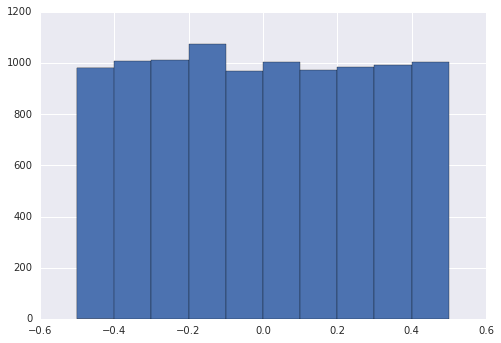

In [109]:
x = beta(a=1.,b=1.).rvs(size=10000)-0.5
plt.hist(x);

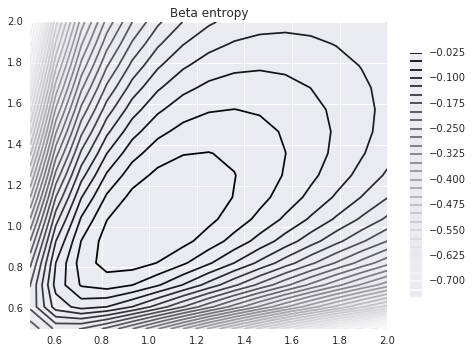

In [110]:
n = 15
a = np.linspace(0.5,2.0,n)
b = np.linspace(0.5,2.0,n)

A,B = np.meshgrid(a,b)

@np.vectorize
def beta_entropy(a, b):
    return beta(a=a,b=b).entropy()

Z = beta_entropy(A,B)

plt.title('Beta entropy')
CS = plt.contour(A, B, Z, 30)
plt.colorbar(CS, shrink=0.8, extend='both');

**Exponential distribution**

* Statement: let $\xi\sim E_{\mu}$, then for any r.v. $\eta: \pr\left( \eta > 0\right)=1$, $\E\eta=\mu^{-1}$:  $H\left(\xi\right)\geq H\left(\eta\right)$.
* Denote $F\left(x,p \right)=-p\log p$ -- entropy function, $\phi_1\left(x,p\right)=p$ -- density function, $\phi_2\left(x,p\right)=x p$.
* Lagrange function: $\displaystyle J\left(p\right)=-\int_{0}^{\infty}p\log p d x \rightarrow \max_p$ with constraints $\displaystyle\int_{0}^{\infty} p d x = 1$, $\displaystyle\int_{0}^{\infty}x p d x = \mu^{-1}$.
* Euler--Lagrange equation: $\displaystyle\frac{\partial F}{\partial p}+\lambda_1\frac{\partial \phi_1}{\partial p} +\lambda_2\frac{\partial \phi_2}{\partial p}=-1-\log p +\lambda_1+\lambda_2 x = 0$ 
* Solution: $\displaystyle p\left(x\right)=e^{\lambda_1 -1+\lambda_2 x}=\mu e^{\mu x}\I_{\left(x \geq 0\right)}$.

In [111]:
expon.entropy()

array(1.0)

**Normal distribution**

* Statement: let $\xi: N\left(a,\sigma^2 \right)$, then for any r.v. $\eta: \E\eta=a, \D\eta =\sigma^2$:  $H\left(\xi\right)\geq H\left(\eta\right)$.
* Denote $F\left(x,p \right)=-p\log p$ -- entropy function, $\phi_1\left(x,p\right)=p$ -- density function, $\phi_2\left(x,p\right)=x^2 p$, let $a\equiv 0$.
* Lagrange function: $\displaystyle J\left(p\right)=-\int_{-\infty}^{\infty}p\log p d x \rightarrow \max_p$ with constraints $\displaystyle\int_{-\infty}^{\infty} p d x = 1$, $\displaystyle\int_{-\infty}^{\infty}x^2 p d x = \sigma^2$.
* Euler-Lagrange equation: $\displaystyle\frac{\partial F}{\partial p}+\lambda_1\frac{\partial \phi_1}{\partial p} +\lambda_2\frac{\partial \phi_2}{\partial p}=-1-\log p +\lambda_1+\lambda_2 x^2 = 0$ 
* Solution: $\displaystyle p\left(x\right)=e^{\lambda_1 -1+\lambda_2 x^2}=\frac{1}{\sqrt{2\pi}\sigma} e^{\frac{-x^2}{2\sigma^2}}$.

In [112]:
norm.entropy()

array(1.4189385332046727)

In [113]:
x = laplace(loc=0,scale=1./np.sqrt(2)).rvs(size=1000)
print(np.mean(x), np.std(x))

-0.00467338912445 1.02535083476


In [114]:
laplace(loc=0,scale=1/np.sqrt(2)).entropy()

array(1.3465735902799727)